In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
ddata = pd.read_csv('WaterQualityMoco.csv')
ddata

,ActivityStartDate,HydrologicEvent,ResultDetectionConditionText,CharacteristicName,ResultSampleFractionText,ResultMeasureValue,DetectionQuantitationLimitMeasure/MeasureValue,ResultAnalyticalMethod/MethodName,ResultAnalyticalMethod/MethodDescriptionText,LaboratoryName,...,SampleCollectionMethod/MethodName,SampleCollectionMethod/MethodDescriptionText,SampleCollectionEquipmentName,ResultIdentifier,MeasureQualifierCode,ResultStatusIdentifier,ResultValueTypeName,USGSPCode,ResultAnalyticalMethod/MethodIdentifier,ResultAnalyticalMethod/MethodIdentifierContext
0,4/6/2021,Routine sample,NaN,Escherichia coli,NaN,81.0,NaN,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey-Water Resources Discipline,...,"10 or more equal width verticals, equal non-is...",NaN,US DH-81,NWIS-120863344,NaN,Accepted,Actual,50468.0,BAC15,USGS
1,4/6/2021,Routine sample,NaN,Total Coliform,Total,2000.0,NaN,"Total coliform, Colilert-18",Standard Methods,U.S. Geological Survey-Water Resources Discipline,...,"10 or more equal width verticals, equal non-is...",NaN,US DH-81,NWIS-120863345,NaN,Accepted,Actual,50569.0,BAC48,USGS
2,3/28/2021,Storm,NaN,Escherichia coli,NaN,86.0,NaN,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey,...,Point sample,NaN,"Sampler, point, automatic",NWIS-120811125,NaN,Accepted,Actual,50468.0,BAC15,USGS
3,3/28/2021,Storm,NaN,Total Coliform,Total,2900.0,NaN,"Total coliform, Colilert-18",Standard Methods,U.S. Geological Survey,...,Point sample,NaN,"Sampler, point, automatic",NWIS-120811126,NaN,Accepted,Actual,50569.0,BAC48,USGS
4,10/25/2021,Storm,NaN,Escherichia coli,NaN,82000.0,NaN,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey,...,Point sample,NaN,"Sampler, point, automatic",NWIS-122669339,NaN,Accepted,Actual,50468.0,BAC15,USGS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,10/4/2022,NaN,NaN,Escherichia coli,Total,980.0,NaN,9223 B ~ Enzyme Substrate Test,https://www.nemi.gov/methods/method_summary/5583,NaN,...,Bucket/Bottle Grab,NaN,Water Bottle,STORET-979863517,NaN,Final,Actual,NaN,9223-B,APHA_SM22ED
1211,10/4/2022,NaN,NaN,Escherichia coli,Total,2430.0,NaN,9223 B ~ Enzyme Substrate Test,https://www.nemi.gov/methods/method_summary/5583,NaN,...,Bucket/Bottle Grab,NaN,Water Bottle,STORET-979863540,NaN,Final,Actual,NaN,9223-B,APHA_SM22ED
1212,11/15/2022,NaN,NaN,Escherichia coli,Total,461.0,NaN,9223 B ~ Enzyme Substrate Test,https://www.nemi.gov/methods/method_summary/5583,NaN,...,Bucket/Bottle Grab,NaN,Water Bottle,STORET-979863827,NaN,Final,Actual,NaN,9223-B,APHA_SM22ED
1213,10/4/2022,NaN,NaN,Escherichia coli,Total,1733.0,NaN,9223 B ~ Enzyme Substrate Test,https://www.nemi.gov/methods/method_summary/5583,NaN,...,Bucket/Bottle Grab,NaN,Water Bottle,STORET-979863545,NaN,Final,Actual,NaN,9223-B,APHA_SM22ED


In [84]:
ddata['DetectionQuantitationLimitMeasure/MeasureValue'].unique()

array([     nan, 2.40e+05, 1.00e-03, 5.00e-03, 5.00e-02, 3.00e-03,
       2.00e-04, 3.60e+00, 2.30e+00, 2.80e+00, 3.70e+00, 3.40e+00,
       2.60e+00, 1.70e+00, 2.20e+00, 1.07e+01, 1.40e+00, 1.60e+00,
       3.00e+00, 1.50e+00, 7.40e+00, 4.60e+00, 4.40e+00, 2.90e+00,
       1.30e+00, 3.30e+00, 1.80e+00, 2.40e+00, 2.70e+00, 6.60e+00,
       1.60e+02, 2.50e+00, 4.10e+00, 3.10e+00, 3.20e+00, 2.10e+00,
       2.00e+00, 3.90e+00, 1.10e+00, 5.40e+00, 1.20e+00, 5.80e+00,
       3.80e+00, 1.15e+01, 1.90e+00, 2.00e+02, 4.00e+00, 1.40e+01,
       5.60e+00, 4.30e+00, 1.39e+01, 1.78e+01, 2.11e+01, 4.50e+00,
       9.40e+00, 8.00e+01, 6.00e+01])

In [85]:
for index, row in ddata.iterrows():
    ddata.loc[index,'outcome'] = 0
    if row['CharacteristicName'] == 'Escherichia coli' :
        ddata.loc[index,'outcome'] = 1
        ddata.loc[index,'DetectionQuantitationLimitMeasure/MeasureValue'] = 240000
    if row['CharacteristicName'] == 'Uranium':
        ddata.loc[index,'outcome'] = 1
    if (row['ResultAnalyticalMethod/MethodDescriptionText'] == 'Pesticides, water, SPE GC&LC/TMS') & (row['ResultDetectionConditionText'] != "Not Detected") :
        ddata.loc[index,'outcome'] = 1
    if (row['ResultAnalyticalMethod/MethodDescriptionText'] == 'Pharma, wf, LC/MS/MS (Sch 2440)') & (row['ResultDetectionConditionText'] != 'Not Detected') :
        ddata.loc[index,'outcome'] = 1
    if np.isnan(row['ResultMeasureValue']) :
        ddata.loc[index,'ResultMeasureValue'] = 0.0
    if np.isnan(row['DetectionQuantitationLimitMeasure/MeasureValue']) :
        ddata.loc[index,'DetectionQuantitationLimitMeasure/MeasureValue'] = 0.0
    if ddata.loc[index,'DetectionQuantitationLimitMeasure/MeasureValue'] > 0 :
        ddata.loc[index,'Rate'] = ddata.loc[index,'ResultMeasureValue'] / ddata.loc[index,'DetectionQuantitationLimitMeasure/MeasureValue']
    else :
        ddata.loc[index,'Rate'] = 0
ddata.head()

,ActivityStartDate,HydrologicEvent,ResultDetectionConditionText,CharacteristicName,ResultSampleFractionText,ResultMeasureValue,DetectionQuantitationLimitMeasure/MeasureValue,ResultAnalyticalMethod/MethodName,ResultAnalyticalMethod/MethodDescriptionText,LaboratoryName,...,SampleCollectionEquipmentName,ResultIdentifier,MeasureQualifierCode,ResultStatusIdentifier,ResultValueTypeName,USGSPCode,ResultAnalyticalMethod/MethodIdentifier,ResultAnalyticalMethod/MethodIdentifierContext,outcome,Rate
0,4/6/2021,Routine sample,NaN,Escherichia coli,NaN,81.0,0.0,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey-Water Resources Discipline,...,US DH-81,NWIS-120863344,NaN,Accepted,Actual,50468.0,BAC15,USGS,1.0,0.0
1,4/6/2021,Routine sample,NaN,Total Coliform,Total,2000.0,0.0,"Total coliform, Colilert-18",Standard Methods,U.S. Geological Survey-Water Resources Discipline,...,US DH-81,NWIS-120863345,NaN,Accepted,Actual,50569.0,BAC48,USGS,0.0,0.0
2,3/28/2021,Storm,NaN,Escherichia coli,NaN,86.0,0.0,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey,...,"Sampler, point, automatic",NWIS-120811125,NaN,Accepted,Actual,50468.0,BAC15,USGS,1.0,0.0
3,3/28/2021,Storm,NaN,Total Coliform,Total,2900.0,0.0,"Total coliform, Colilert-18",Standard Methods,U.S. Geological Survey,...,"Sampler, point, automatic",NWIS-120811126,NaN,Accepted,Actual,50569.0,BAC48,USGS,0.0,0.0
4,10/25/2021,Storm,NaN,Escherichia coli,NaN,82000.0,0.0,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey,...,"Sampler, point, automatic",NWIS-122669339,NaN,Accepted,Actual,50468.0,BAC15,USGS,1.0,0.0


In [86]:
ddata['ResultDetectionConditionText'].unique()

array([nan, 'Present Above Quantification Limit', 'Not Detected',
       'Not Reported'], dtype=object)

In [87]:
ecoli = ddata
ecoli

,ActivityStartDate,HydrologicEvent,ResultDetectionConditionText,CharacteristicName,ResultSampleFractionText,ResultMeasureValue,DetectionQuantitationLimitMeasure/MeasureValue,ResultAnalyticalMethod/MethodName,ResultAnalyticalMethod/MethodDescriptionText,LaboratoryName,...,SampleCollectionEquipmentName,ResultIdentifier,MeasureQualifierCode,ResultStatusIdentifier,ResultValueTypeName,USGSPCode,ResultAnalyticalMethod/MethodIdentifier,ResultAnalyticalMethod/MethodIdentifierContext,outcome,Rate
0,4/6/2021,Routine sample,NaN,Escherichia coli,NaN,81.0,0.0,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey-Water Resources Discipline,...,US DH-81,NWIS-120863344,NaN,Accepted,Actual,50468.0,BAC15,USGS,1.0,0.0
1,4/6/2021,Routine sample,NaN,Total Coliform,Total,2000.0,0.0,"Total coliform, Colilert-18",Standard Methods,U.S. Geological Survey-Water Resources Discipline,...,US DH-81,NWIS-120863345,NaN,Accepted,Actual,50569.0,BAC48,USGS,0.0,0.0
2,3/28/2021,Storm,NaN,Escherichia coli,NaN,86.0,0.0,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey,...,"Sampler, point, automatic",NWIS-120811125,NaN,Accepted,Actual,50468.0,BAC15,USGS,1.0,0.0
3,3/28/2021,Storm,NaN,Total Coliform,Total,2900.0,0.0,"Total coliform, Colilert-18",Standard Methods,U.S. Geological Survey,...,"Sampler, point, automatic",NWIS-120811126,NaN,Accepted,Actual,50569.0,BAC48,USGS,0.0,0.0
4,10/25/2021,Storm,NaN,Escherichia coli,NaN,82000.0,0.0,"E coli, water,Colilert-18(18-22)",Standard Methods,U.S. Geological Survey,...,"Sampler, point, automatic",NWIS-122669339,NaN,Accepted,Actual,50468.0,BAC15,USGS,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,10/4/2022,NaN,NaN,Escherichia coli,Total,980.0,0.0,9223 B ~ Enzyme Substrate Test,https://www.nemi.gov/methods/method_summary/5583,NaN,...,Water Bottle,STORET-979863517,NaN,Final,Actual,NaN,9223-B,APHA_SM22ED,1.0,0.0
1211,10/4/2022,NaN,NaN,Escherichia coli,Total,2430.0,0.0,9223 B ~ Enzyme Substrate Test,https://www.nemi.gov/methods/method_summary/5583,NaN,...,Water Bottle,STORET-979863540,NaN,Final,Actual,NaN,9223-B,APHA_SM22ED,1.0,0.0
1212,11/15/2022,NaN,NaN,Escherichia coli,Total,461.0,0.0,9223 B ~ Enzyme Substrate Test,https://www.nemi.gov/methods/method_summary/5583,NaN,...,Water Bottle,STORET-979863827,NaN,Final,Actual,NaN,9223-B,APHA_SM22ED,1.0,0.0
1213,10/4/2022,NaN,NaN,Escherichia coli,Total,1733.0,0.0,9223 B ~ Enzyme Substrate Test,https://www.nemi.gov/methods/method_summary/5583,NaN,...,Water Bottle,STORET-979863545,NaN,Final,Actual,NaN,9223-B,APHA_SM22ED,1.0,0.0


In [88]:
ecoli['DetectionQuantitationLimitMeasure/MeasureValue'].unique()

array([0.00e+00, 2.40e+05, 1.00e-03, 5.00e-03, 5.00e-02, 3.00e-03,
       2.00e-04, 3.60e+00, 2.30e+00, 2.80e+00, 3.70e+00, 3.40e+00,
       2.60e+00, 1.70e+00, 2.20e+00, 1.07e+01, 1.40e+00, 1.60e+00,
       3.00e+00, 1.50e+00, 7.40e+00, 4.60e+00, 4.40e+00, 2.90e+00,
       1.30e+00, 3.30e+00, 1.80e+00, 2.40e+00, 2.70e+00, 6.60e+00,
       1.60e+02, 2.50e+00, 4.10e+00, 3.10e+00, 3.20e+00, 2.10e+00,
       2.00e+00, 3.90e+00, 1.10e+00, 5.40e+00, 1.20e+00, 5.80e+00,
       3.80e+00, 1.15e+01, 1.90e+00, 2.00e+02, 4.00e+00, 1.40e+01,
       5.60e+00, 4.30e+00, 1.39e+01, 1.78e+01, 2.11e+01, 4.50e+00,
       9.40e+00, 8.00e+01, 6.00e+01])

In [89]:
LE = preprocessing.LabelEncoder()
ecoli['event_identifier'] = LE.fit_transform(ecoli['HydrologicEvent'])
ecoli.loc[:, ['event_identifier', 'HydrologicEvent']]

,event_identifier,HydrologicEvent
0,0,Routine sample
1,0,Routine sample
2,2,Storm
3,2,Storm
4,2,Storm
...,...,...
1210,3,NaN
1211,3,NaN
1212,3,NaN
1213,3,NaN


In [90]:
ecoli['char_identifier'] = LE.fit_transform(ecoli['CharacteristicName'])
ecoli.loc[:, ['char_identifier', 'CharacteristicName']]

,char_identifier,CharacteristicName
0,62,Escherichia coli
1,174,Total Coliform
2,62,Escherichia coli
3,174,Total Coliform
4,62,Escherichia coli
...,...,...
1210,62,Escherichia coli
1211,62,Escherichia coli
1212,62,Escherichia coli
1213,62,Escherichia coli


In [97]:
X = ecoli.loc[:, ['event_identifier', 'ResultMeasureValue', 'char_identifier', "Rate"]]
y = ecoli.outcome
X.head()

,event_identifier,ResultMeasureValue,char_identifier,Rate
0,0,81.0,62,0.0
1,0,2000.0,174,0.0
2,2,86.0,62,0.0
3,2,2900.0,174,0.0
4,2,82000.0,62,0.0


In [98]:
ecoli["Rate"].unique()

array([0.00000000e+00, 3.42000000e+04, 2.12000000e+03, 7.96000000e+02,
       2.23000000e+03, 2.52000000e+02, 7.82608696e-01, 9.54545455e-01,
       1.07142857e+00, 1.46666667e+00, 2.06896552e+00, 8.25000000e-01,
       1.00000000e+00, 1.09411765e+01, 2.09677419e+00, 3.58823529e+00,
       8.69565217e-01, 2.93750000e+00, 1.27857143e+01, 8.66666667e+00,
       3.47058824e+00, 9.09090909e-01, 2.26666667e+00, 3.30769231e+00,
       7.29411765e+00, 3.35000000e+00, 7.00000000e-01, 1.44827586e+00,
       2.15000000e+00, 9.33333333e-01, 7.27272727e-01, 4.47222222e+00,
       1.45500000e+01, 1.72727273e+00, 1.35600000e+02, 7.05405405e+00,
       2.58125000e+01, 3.59000000e+04, 2.30000000e+03, 7.92000000e+02,
       2.47666667e+03, 1.48500000e+02, 8.26086957e-01, 1.45454545e+00,
       9.28571429e-01, 6.00000000e-01, 1.17857143e+00, 2.75862069e+00,
       9.18750000e-01, 8.09523810e-01, 1.11176471e+01, 7.88235294e+01,
       1.87096774e+00, 2.82352941e+00, 1.13043478e+00, 3.06250000e+00,
      

In [99]:
# Split the data into train and test, 25%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Instantiate, preprocess, train, and predict (test)
LogReg = LogisticRegression()

In [100]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0. 1.]
Intercept [-1.34802883]
Coefficients [[ 1.26610091 -0.01332755 -0.95295759 -0.23658476]]


In [101]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.7697368421052632
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83       207
         1.0       0.64      0.63      0.64        97

    accuracy                           0.77       304
   macro avg       0.73      0.73      0.73       304
weighted avg       0.77      0.77      0.77       304



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


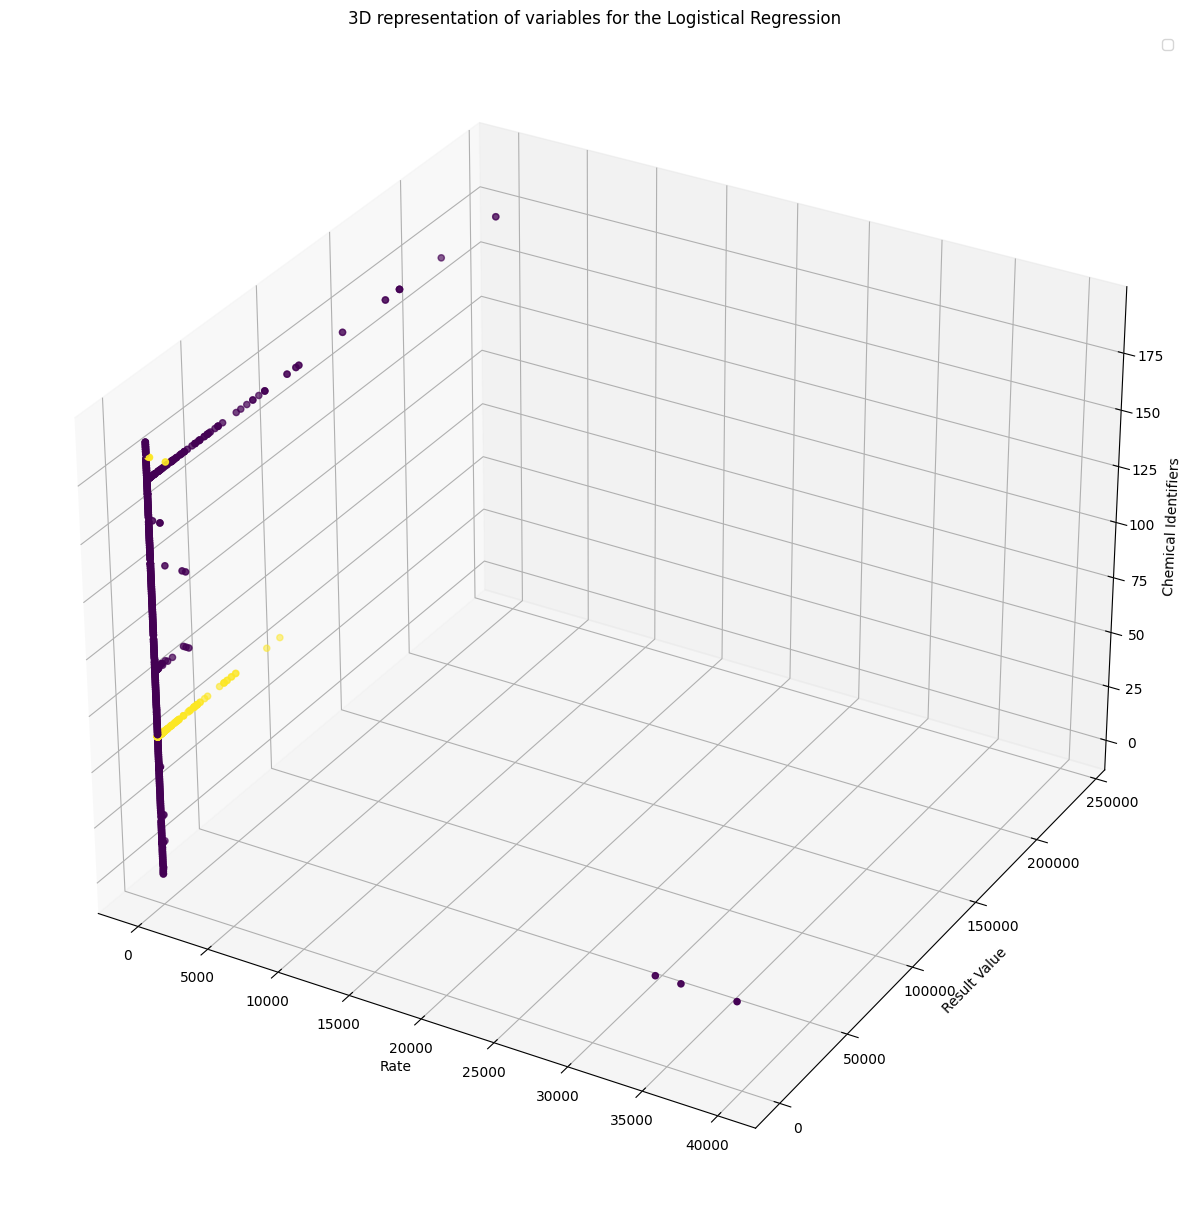

In [103]:
x = X['Rate']
w = X['ResultMeasureValue']
z = X['char_identifier']
fig = plt.figure(figsize = (12, 12))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, w, z, c = y)
plt.xlabel('Rate')
plt.ylabel('Result Value')
ax.set_zlabel('Chemical Identifiers')
plt.tight_layout()
plt.title('3D representation of variables for the Logistical Regression')
ax.legend(loc="upper right")
plt.show()